<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/03_distplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: distplot

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import random
from scipy.stats import skewnorm

In [2]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
sns.set_style('white')

## Intro Visuals

In [5]:
hp = cars.horsepower.sample(100, random_state=100)

In [6]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

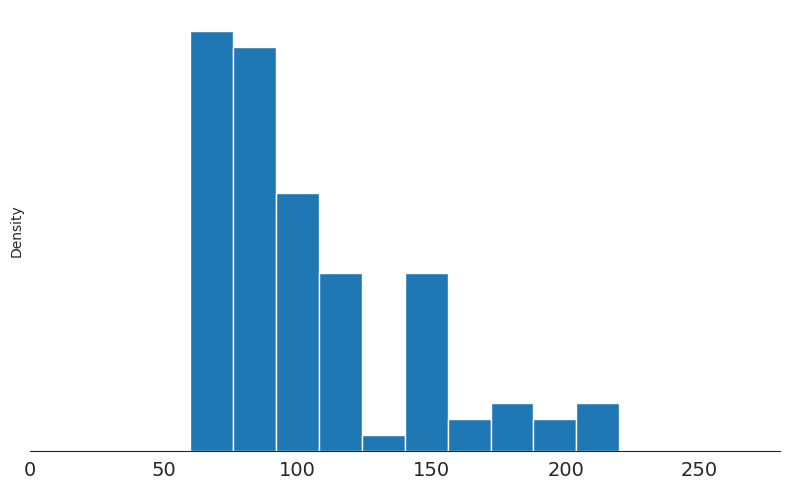

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=hp,
            stat='density',
            alpha=1)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout()

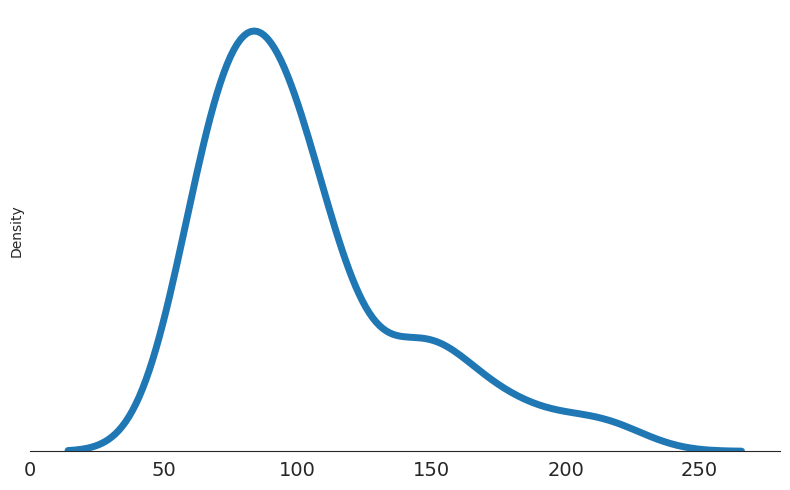

In [31]:
plt.figure(figsize=(8, 5))

# Create density plot using kdeplot instead of deprecated distplot
sns.kdeplot(data=hp, linewidth=5)

# Remove left spine
sns.despine(left=True)

# Set x-axis limits
plt.xlim(0, 280)

# Remove x-label and y-ticks
plt.xlabel('')
plt.yticks([])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Basics

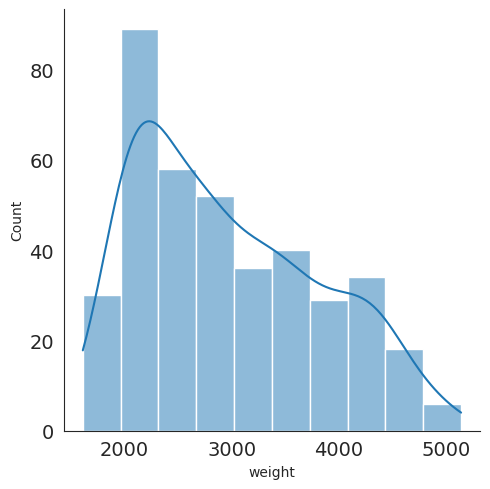

In [38]:
sns.displot(data=cars, x='weight', kde=True)
plt.show()

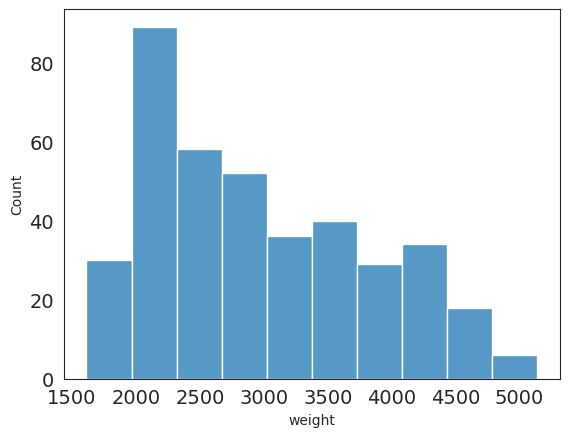

In [46]:
sns.histplot(cars.weight, kde=False)

## Options

### Bins

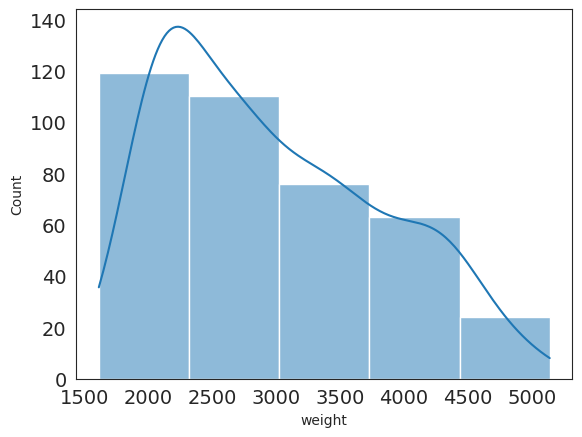

In [49]:
sns.histplot(data=cars, x='weight', bins=5, kde=True)

plt.show()

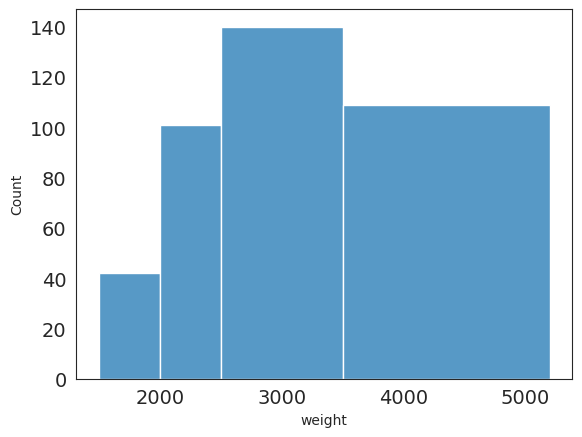

In [51]:
sns.histplot(cars.weight, bins=[1500, 2000, 2500, 3500, 5200])

### Fit

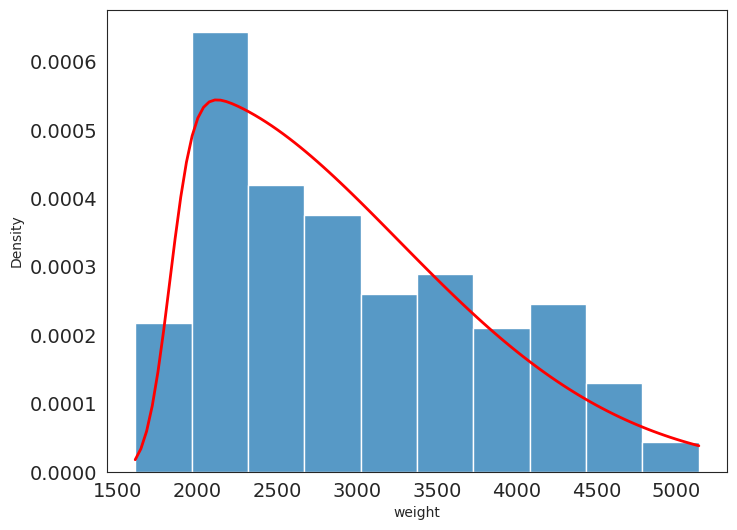

In [59]:
plt.figure(figsize=(8, 6))

# Create histogram
sns.histplot(data=cars, x='weight', stat='density')

# Fit skewed normal distribution
params = skewnorm.fit(cars.weight)
x = np.linspace(cars.weight.min(), cars.weight.max(), 100)
pdf = skewnorm.pdf(x, *params)

# Plot the fitted distribution
plt.plot(x, pdf, 'r-', lw=2)

plt.show()

## Kwargs

### hist_kws

<Axes: xlabel='weight', ylabel='Count'>

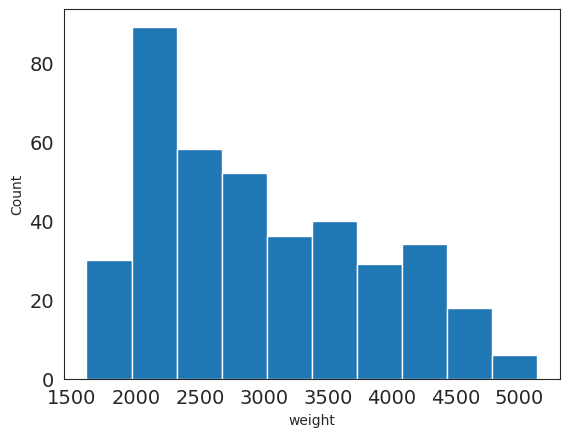

In [60]:
sns.histplot(data=cars, x='weight', alpha=1)

### kde_kws

<Axes: xlabel='weight', ylabel='Count'>

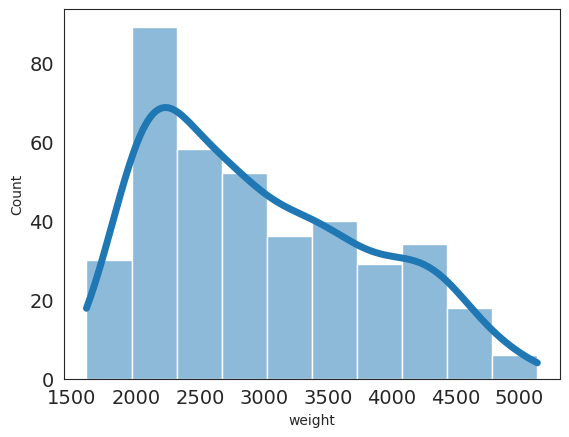

In [61]:
sns.histplot(data=cars, x='weight', kde=True, line_kws={'linewidth': 5})

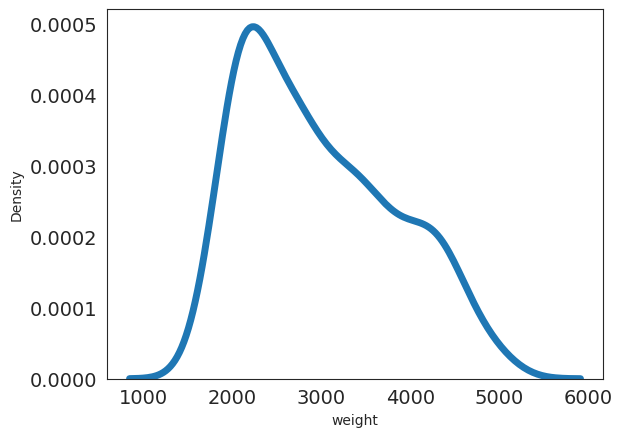

In [20]:
sns.kdeplot(cars.weight, lw=5)

<Axes: xlabel='weight', ylabel='Count'>

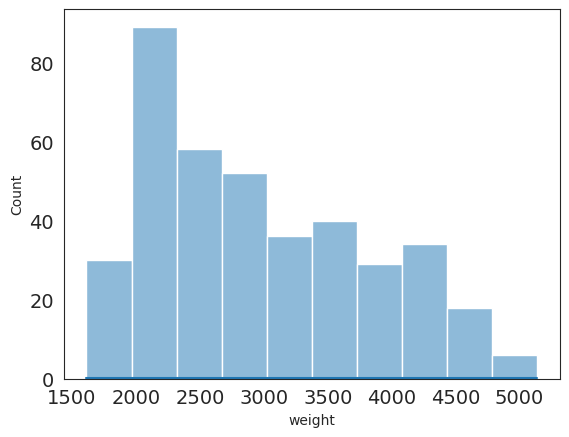

In [62]:
sns.histplot(cars.weight, kde=True, kde_kws={'bw_adjust': 1000})  # Use histplot

### rug_kws

<Axes: xlabel='weight', ylabel='Count'>

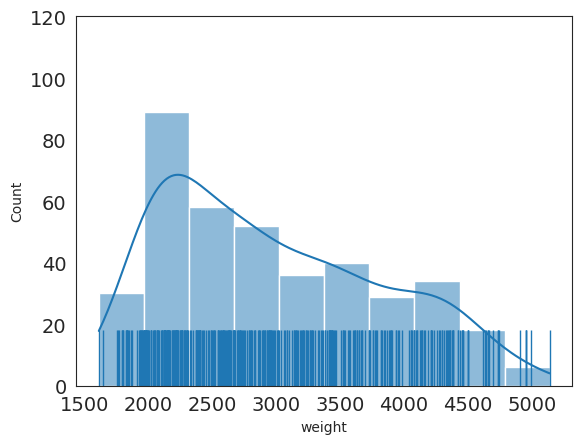

In [65]:
sns.histplot(cars.weight, kde=True)  # Plot the histogram and KDE
sns.rugplot(cars.weight, height=0.15)

<Axes: xlabel='weight', ylabel='Count'>

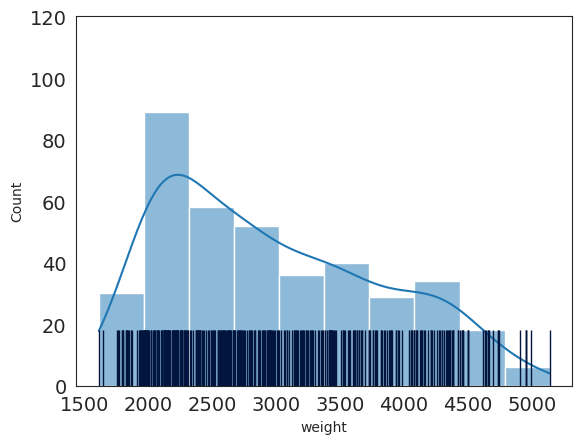

In [66]:
sns.histplot(cars.weight, kde=True)
sns.rugplot(cars.weight, height=0.15, color='xkcd:navy')

## Styled Distplots

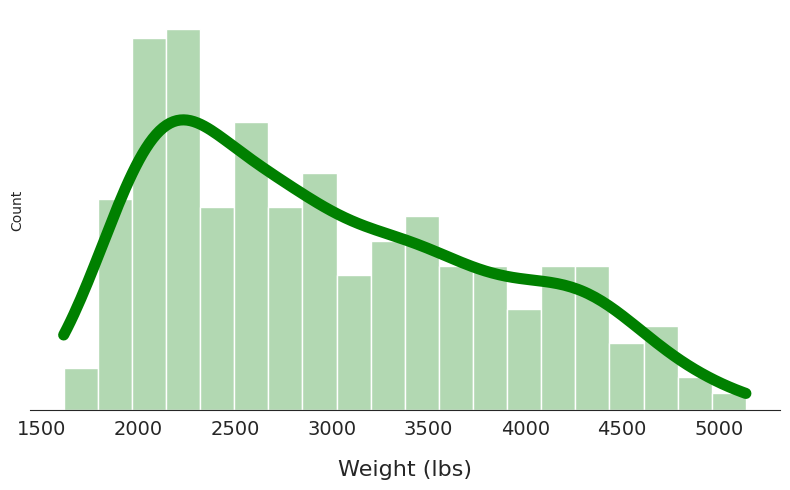

In [73]:
sns.set_style('white')

plt.figure(figsize=(8, 5))

sns.histplot(data=cars, x='weight',
             bins=20,
             kde=True,
             line_kws={"linewidth": 8, 'color':'xkcd:bluish green'},  # line_kws at the top level
             alpha=0.3, color='green'
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout()

plt.savefig('03dist_styleWeight_greenKDE.svg')
plt.show()

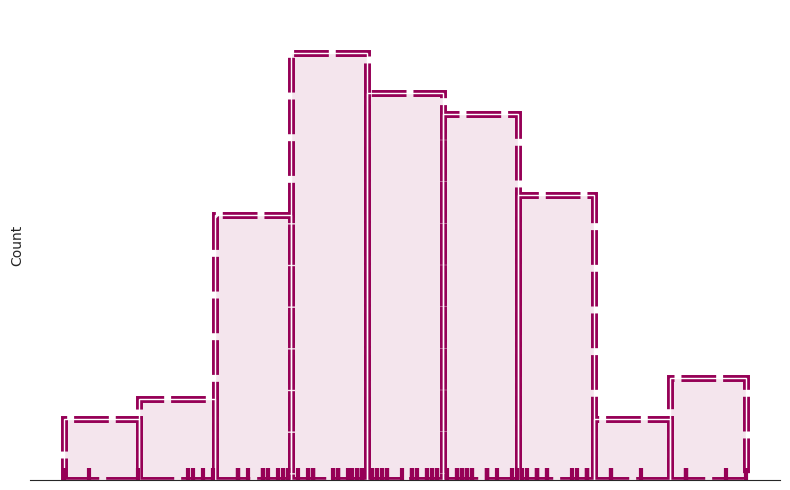

In [93]:
# 1. Data Cleaning (Crucial - Address the original error)
cars['acceleration'] = pd.to_numeric(cars['acceleration'], errors='coerce')  # Convert to numeric, handle errors
cars.dropna(subset=['acceleration'], inplace=True) # Remove rows with NaN after conversion

# 2. Sampling (Do this *after* cleaning)
acceleration_sample = cars.acceleration.sample(100, random_state=100)

# 3. Plotting with histplot and rugplot
sns.set_style('white')
plt.figure(figsize=(8, 5))

# Main Histogram (Step-like, unfilled)
sns.histplot(acceleration_sample,
             fill=False,
             linewidth=5,
             linestyle=(0, (5, 1)),
             alpha=1,
             color='xkcd:dark magenta',
             kde=False)  # Important: kde=False

# Filled Histogram
sns.histplot(acceleration_sample,
             fill=True,
             alpha=0.1,
             color='xkcd:dark magenta',
             kde=False) # Important: kde=False


# Rug Plot (Separate function)
sns.rugplot(acceleration_sample,
            color='xkcd:dark magenta',
            linewidth=3)


sns.despine(left=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('03dist_styleAcc_pink.svg')
plt.show()

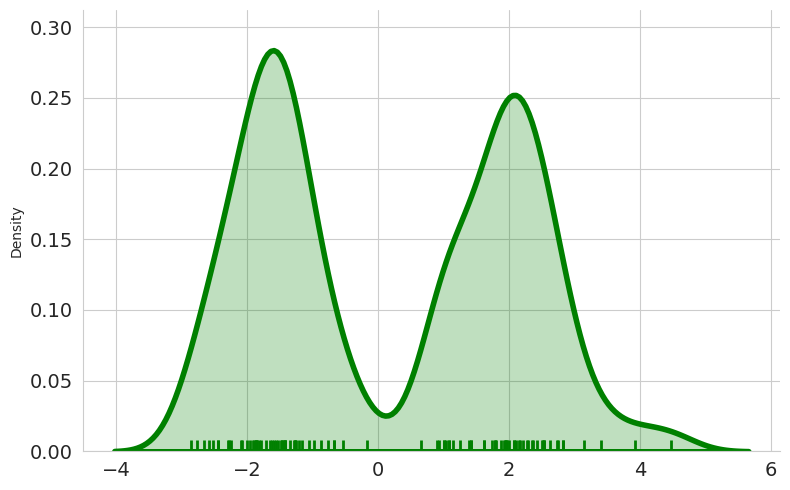

In [91]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(11)

data = [random.gauss(2, 0.75) for _ in range(50)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))

sns.kdeplot(data,
            color='green',
            linewidth=4,  # Use linewidth instead of lw
            fill=True,       # Use fill instead of shade
            bw_adjust=0.5)  # Use bw_adjust instead of bw

sns.rugplot(data,
            color='green',
            linewidth=2)  # Use linewidth instead of lw

sns.despine()
plt.xlabel('')
plt.tight_layout()

# plt.savefig('03dist_styleRand_greenKDErug.svg')
plt.show()  # To display the plot

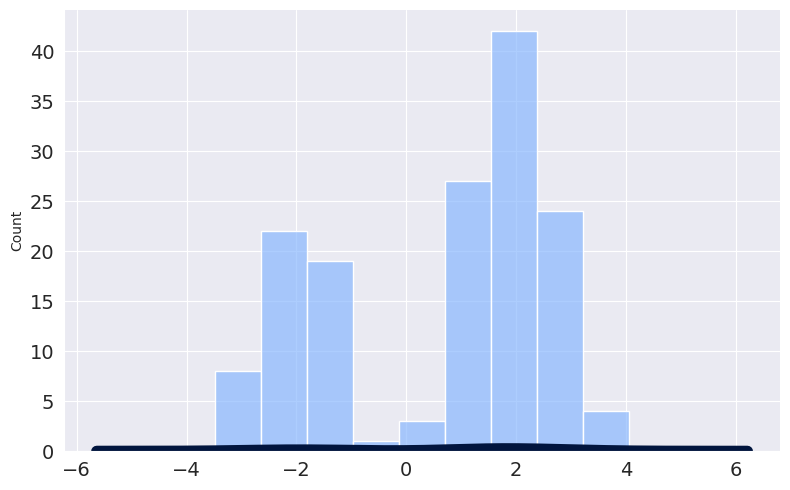

In [94]:
sns.set_style('darkgrid')

data = [random.gauss(2, 0.75) for _ in range(100)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

plt.figure(figsize=(8, 5))

sns.histplot(data,
             fill=True,          # Use fill instead of histtype='stepfilled'
             alpha=0.7,
             color='xkcd:carolina blue',
             kde=False)         # Explicitly turn off KDE in histplot

sns.kdeplot(data,
            linewidth=8,       # Use linewidth instead of lw
            color='xkcd:navy')

sns.despine()
plt.xlabel('')
plt.tight_layout()

# plt.savefig('03dist_styleRand_carolina.svg')
plt.show()